# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Sanika Suhas Pol </font>

# I. Introduction
 
The purpose of this assignment is to learn different classification models. I am using the online shopper's intension dataset. I will first preprocess the data where I will handle missing values if any and encode the categorical attributes using on hot encoding. I am implementing following 4 classification algorithms and plotting the results for the same.
<ul style="list-style-type:circle;">
    <li>Pocket algorithm.</li>
    <li>Quadratic Discriminant Analysis (QDA)</li>
    <li>Linear Discriminant Analysis (LDA)</li>
    <li>Logistic Regression</li>
</ul>    
Later I will compare which model performs better than the other models using some performance measures.    

# II. Data

## Description 

<font> This dataset is about intension of a customer shopping online. It consists of 12330 entries and 18 attributes. The target label 'Revenue' has binary values true or false which suggest whether the customer will purchase the product or not. The data has 10 numerical attributes and 8 categorical attributes. <br><font/>
Following is the description of the attributes:

|        Name                   |  Description                        |
|:------------------------------|:------------------------------------|
|        Administrative         |Number of pages visited by the visitor about account management             |
|Administrative_Duration        |Total amount of time (in seconds) spent by the visitor on account management related pages 
|Informational                  |Number of pages visited by the visitor about Web site,                             communication and address information of the shopping site
|Informational_Duration         |Total amount of time (in seconds) spent by the visitor on informational pages
|ProductRelated                 |Number of pages visited by visitor about product related pages
|ProductRelated_Duration        |Total amount of time (in seconds) spent by the visitor on product related pages
|BounceRates                    |Average bounce rate value of the pages visited by the visitor
|ExitRates                      |Average exit rate value of the pages visited by the visitor
|PageValues                     |Average page value of the pages visited by the visitor
|SpecialDay                     |Closeness of the site visiting time to a special day
|Month                          |Month value of the visit date
|OperatingSystems               |Operating system of the visitor
|Browser                        |Browser of the visitor 
|Region                         |Geographic region from which the session has been started by the visitor
|TrafficType                    |Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
|VisitorType                    |Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’
|Weekend                        |Boolean value indicating whether the date of the visit is weekend
|Revenue                        |Class label indicating whether the visit has been finalized with a transaction

I got this data from the UCI machine learning repositary. Following is the link where this data can be found.<br> 
<a href="https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset">
Online Shoppers Purchasing Intention Dataset</a>

## Plots for understanding or analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

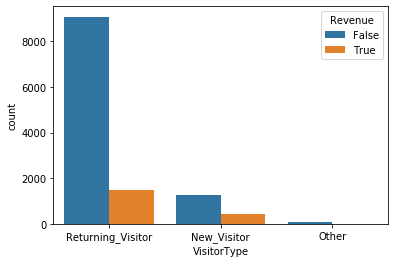

In [6]:
sns.countplot(x = "VisitorType" , hue = 'Revenue' ,data = df)

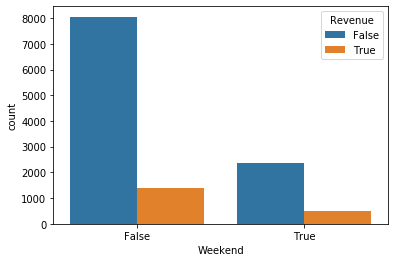

In [7]:
sns.countplot(x = 'Weekend', hue = 'Revenue' ,data = df)

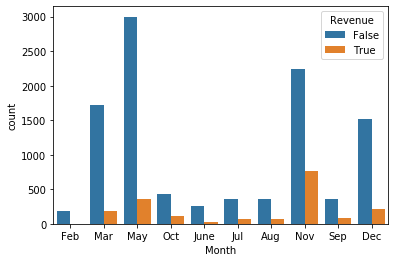

In [8]:
sns.countplot(x = 'Month', hue = 'Revenue' ,data = df)

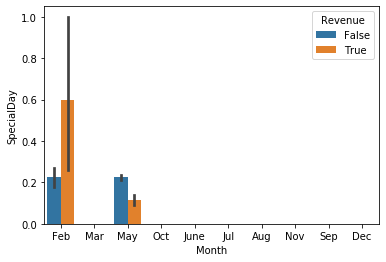

In [9]:
sns.barplot(x = 'Month', y = 'SpecialDay' ,hue = 'Revenue',data = df) 

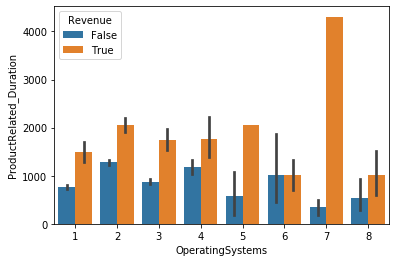

In [10]:
sns.barplot(x = 'OperatingSystems', y = 'ProductRelated_Duration' ,hue = 'Revenue',data = df) 

/Users/sanikapol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


([<matplotlib.patches.Wedge at 0x1a17748a20>,
 [Text(0.9725550024353201, 0.5139423773518141, 'True'),
  Text(-0.9725549783759403, -0.5139424228803988, 'Flase')])

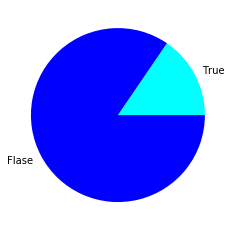

In [11]:
df_revenue = df[['Revenue']]
tCount = df_revenue[df_revenue['Revenue']==1].count()
fCount = df_revenue[df_revenue['Revenue']==0].count()
s = [[tCount,fCount]]
plt.pie(x = s, labels = ['True','Flase'], colors = ['cyan','blue'])

In [12]:
le = LabelEncoder()
label_month = le.fit_transform(df['Month'])
label_visitorType = le.fit_transform(df['VisitorType'])
label_weekend = le.fit_transform(df['Weekend'])
label_revenue = le.fit_transform(df['Revenue'])

In [13]:
df.drop(['Month'],axis =1) 
df['Month'] = label_month
df.drop(['VisitorType'],axis =1) 
df['VisitorType'] = label_visitorType
df.drop(['Weekend'],axis =1) 
df['Weekend'] = label_weekend
df.drop(['Revenue'],axis =1) 
df['Revenue'] = label_revenue
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [14]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


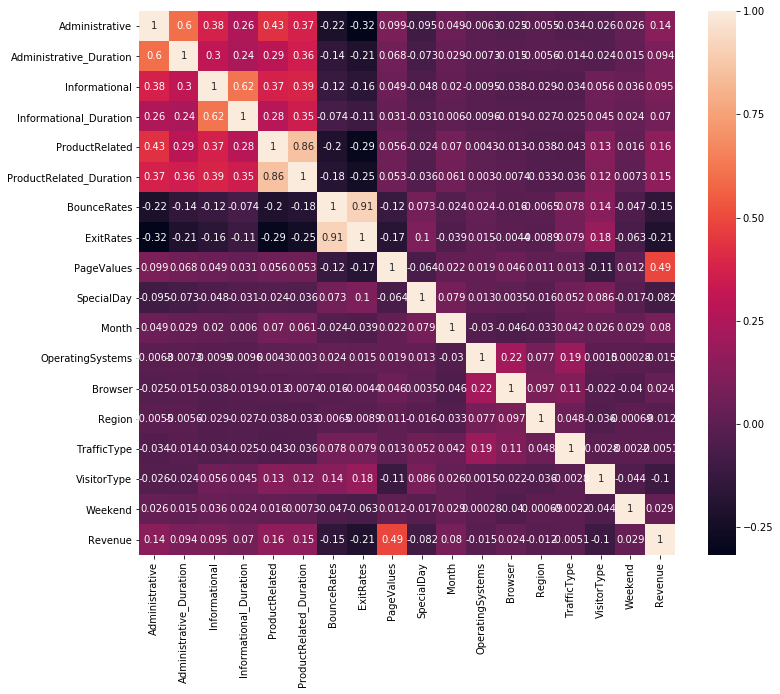

In [15]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data = corr, annot = True,cbar = True)

In [16]:
df_pocket = df[['Month','Region','VisitorType','Weekend','Revenue']]

## Preliminary observation

<font>I have plotted various graphs to check how the customer is shopping. Whether the customer will buy the product and complete the transaction or not and hence will the revenue be generated or not. Following are the observations:<br>
<ul style="list-style-type:circle;">
    <li>People from region 1 and 3 are more active in browsing the website. However not lot of them complete the transaction.</li>
    <li>If a customer is returning again, there is a less chance that he or she will complete the transaction.</li>
    <li>The number of people visiting the website and more on weekdays then weekends.</li>
    <li>A lot of browsing or window shopping is done in the months of March, May, November and December compared to other months.</li>
    <li>A lot of customer completed the transactions in month if February on a special day.</li> 
    <li>Incase of product related pages, more the customer accesses these pages or spends time on these pages, more revenue is generated as the customer completed the transactions.</li></ul>
To conclude a lot of customers tend to just browse the website but not actually buy a product. The graphs can also indicate that the customers might be browsing a product multiple times before buying it, thus increasing the count of false vales in the revenue column.
</font>

# III. Method
## Summary of Classification models

### Pocket Algorithm
The pocket algorithm which is a variant of perceptron algorithm solves the stability problem of perceptron learning by keeping the best solution seen so far in its pocket. The pocket algorithm then returns the solution in the pocket, rather than the last solution. Each input value x_i is multiplied by a weight-factor w_i. As perceptron does not guarantee on convergence for a non linearly separable data, we set a maximum number of iterations for training. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best. Thus we use pocket to keep the best solution till far and return it.   

### QDA
Quadratic Discriminant Analysis (QDA) is a type of Bayesian classifier. Given input X, the classifier computes the probability for each class. It returns maximum probability value as the output. This is called the posterior probability. To find the probability, it computes the likelihood that given data point will likely be classified into c class. To compute this likelihood, it uses Gaussian distribution for each class. The final discriminant function $\delta_k(xv)$ is:

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{x}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

and decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $x$, the decision boundary is quadratic. 
this approach is called as Quadratic Discriminant Analysis.

### LDA

Linear Discriminant Analysis (LDA) also works similar to QDA where it computes the probability of the input being classified in each class and returns the maximum probability as the output. However, unlike QDA, LDA calculates a  single covariance matrix for all classes. <br>
In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

The discriminant function for LDA is:
$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

### Logistic Regression
Logistic regression is an extension of linear regression. Linear regression does not limit the output and hence is not suitable for classification. But we can consider a linear regression model where it predicts the probability of an input for all classes rather than its label restricting the output between 0 and 1. This approach is called as logistic regression. We consider a threshold value for classification. Say we have two classes k1 and k2 and threshold t = 0.5. If t is greater then 0.5, output will be k1 else it will be k2. <br>
$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

Converting the summation into matrix calculation,

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).
$$

### A. Super Classs Definition

In [17]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None
    
    def normalize(self,X,isTrain):
        # standardize the input X 
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)
            
        if isTrain: 
            self.meanX = np.mean(X, 0)
            self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX)/self.stdX 
        return Xs
    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [18]:
from copy import deepcopy as copy 
class PocketAlgorithm(Classifier):
    
    def __init__(self,maxiter,alpha):
        Classifier.__init__(self)
        self.maxiter = maxiter
        self.alpha = alpha
        self.w = None
        self.w_pocket = None
        
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):
        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)
        for i in range(self.maxiter):
            converged = True
            for k in range(X.shape[0]): 
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        print(self.w_pocket)
    
    def use(self, X):
        return np.sign(X@self.w_pocket)
        

### C. QDA



In [19]:
class QDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.sigma1 = None
        self.prior1 = None
        self.mu2 = None
        self.sigma2 = None
        self.prior2 = None
        
    def QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    
    def train(self,X,N1):
        N = X.shape[0]
        X = super().normalize(X,True)
        X = np.array(X)
        self.mu1 = np.mean(X[:N1], 0)
        self.mu2 = np.mean(X[N1:], 0)
        self.sigma1 = np.cov(X[:N1].T)
        self.sigma2 = np.cov(X[N1:].T)
        self.prior1 = N1/N
        self.prior2 = (N-N1)/N

    def use(self,X):
        X = super().normalize(X,False)
        X = np.array(X)
        d1 = self.QDA(X, self.mu1, self.sigma1, self.prior1)   
        d2 = self.QDA(X, self.mu2, self.sigma2, self.prior2) 
        y  = np.where(d1>d2,1,0)
        return y,d1,d2

### D. LDA

In [20]:
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.prior1 = None
        self.mu2 = None
        self.prior2 = None
        self.sigma = None
        
    def FindMean(self):
        return self.mu1,self.mu2
    
    def LDA(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv) * mu \
            - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
            + np.log(prior)

    def train(self,X,N1):
        N = X.shape[0]
        X = super().normalize(X,True)
        self.mu1 = np.mean(X[:N1], 0)
        self.mu2 = np.mean(X[N1:], 0)
        self.sigma = np.cov(X.T)
        self.prior1 = N1/N
        self.prior2 = (N-N1)/N

    def use(self,X):
        X = super().normalize(X,False)
        d1 = self.LDA(X, self.mu1, self.sigma, self.prior1)   
        d2 = self.LDA(X, self.mu2, self.sigma, self.prior2) 
        y  = np.where(d1>d2,1,0)
        return y,d1,d2

### E. Logistic Regression

In [21]:
class LogisticRegression(Classifier):
    def __init__(self,niter,alpha):
        Classifier.__init__(self)
        self.niter = niter
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        s = (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
        ans = f/s
        return ans
        
    
    def g(self,X, w):
        return self.softmax(X @ w)
    
    def train(self,X,T):
        X = super().normalize(X,True)
        X = super().add_ones(X)
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        T = self.add_ones(T.reshape(-1,1))
        (T[:,0])[T[:,1]==1] = 0
        self.w = np.random.rand(D,K)
        for step in range(self.niter):
            ys = self.g(X, self.w)
            self.w += self.alpha * X.T @ (T - ys)
            
    def use(self,X):
        X = self.normalize(X,False)
        X = self.add_ones(X)
        y = self.g(X, self.w)
        return y

### Explanation of codes
#### Super Class and Classifier
The BaseModel is our super class where there are two abstract methods train and use. The Classifier inherits BaseModel and implements few more methods. On of these functions is normalize. In this function, I introduced a new boolean parameter isTrain. This checks whether the passed data is training data or testing data. If it is training data, I calculate the mean and standard deviation. Using the mean and standard deviation I then normalize the data. In case of testing data, I use the mean and standard deviation calculated on testing data. 

#### Pocket Algorithm
The PocketAlgorithm class inherits, the Classifier class. I am passing the maxiter and alpha while initializing the class. In the train method, weights are initialized to zero. Then I iterate over the data using maxiter and update the weight. The weight is updated using alpha and is then compared with the weight in pocket. This is done using compare method. In the use function, weight stored in pocket is returned.

#### QDA
In the init function, I am initializing the mu1, mu2, sigma1, sigma2, prior1, and prior2 to none. I have two target classes for my data. In the train function I am normalizing the data and then calculating values for mu1, mu2, sigma1, sigma2, prior1, and prior2. I am passing the number of input instances for positive class. Using that number I am calculating the values of prior1 = N1/N and prior2 = (N-N1)/N. In use function, I call the qda function which returns the probability of each target class. I return the max probability as the output.

#### LDA
In the init function, I am initializing the mu1, mu2, sigma, prior1, and prior2 to none. I have two target classes for my data. In the train function I am normalizing the data and then calculating values for mu1, mu2, sigma, prior1, and prior2. I am passing the number of input instances for positive class. Using that number I am calculating the values of prior1 = N1/N and prior2 = (N-N1)/N. In use function, I call the lda function which returns the probabilities of each target class. I return the max probability as the output.

# IV. Experiments

## Plots for results

### Pocket Algorithm

In [22]:
import random
X = df_pocket   
T = df_pocket[['Revenue']]
X = X.drop(['Revenue'],axis = 1)
indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
random.seed(0)
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
T_train, T_test = T.iloc[train_indices], T.iloc[test_indices]
X_train = X_train.iloc[:1000]
T_train = T_train.iloc[:1000]
X_test = X_test.iloc[:250]
T_test = T_test.iloc[:250]

x_train = np.array(X_train)
t_train = np.array(T_train)
x_test = np.array(X_test)
t_test = np.array(T_test)

End of training:  4
[-0.00300044 -0.00367807 -0.0361696  -0.00554914]


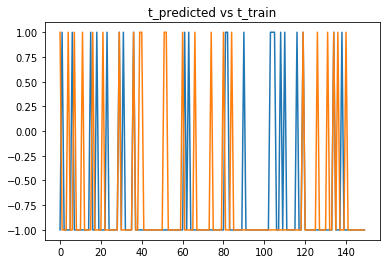

In [23]:
pocket = PocketAlgorithm(5,0.01) 
x_train = pocket.normalize(x_train,True)
x_test = pocket.normalize(x_test,False)
t_train = pocket.normalize(t_train,True)
t_train = np.sign(t_train)
t_test = pocket.normalize(t_test,False)
t_test = np.sign(t_test)
pocket.train(x_train,t_train)
plt.title('t_predicted vs t_train')
t_predicted_train = pocket.use(x_train)
t_predicted_test = pocket.use(x_test)
plt.plot(t_test[0:150])
plt.plot(t_predicted_test[0:150])
plt.show()

In [24]:
def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

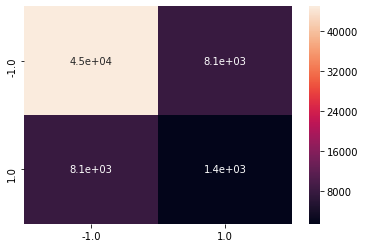

In [25]:
cf = confusion_matrix(t_predicted_test,t_test)
sns.heatmap(cf, annot=True);

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
"""TN = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TP = cf[1][1]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
print('Precision: ',precision)
print('Recall: ',recall)
print('Specificity: ',specificity)
print('Accuracy:', accuracy_score(t_train,t_predicted_train))
F1_score = 2*precision*recall/(precision+recall)
print('F1 score:',F1_score)"""

"TN = cf[0][0]\nFP = cf[0][1]\nFN = cf[1][0]\nTP = cf[1][1]\nprecision = TP/(TP+FP)\nrecall = TP/(TP+FN)\nspecificity = TN/(TN+FP)\nprint('Precision: ',precision)\nprint('Recall: ',recall)\nprint('Specificity: ',specificity)\nprint('Accuracy:', accuracy_score(t_train,t_predicted_train))\nF1_score = 2*precision*recall/(precision+recall)\nprint('F1 score:',F1_score)"

In [27]:
print('Precision: ',precision_score(t_train,t_predicted_train))
print('Recall: ',recall_score(t_train,t_predicted_train))
print('Accuracy:', accuracy_score(t_train,t_predicted_train))
print('F1 score:',f1_score(t_train,t_predicted_train))

Precision:  0.19696969696969696
Recall:  0.174496644295302
Accuracy: 0.771
F1 score: 0.1850533807829181


### QDA

In [28]:
X = df   
T = df[['Revenue']]
indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
T_train, T_test = T.iloc[train_indices], T.iloc[test_indices]

X_train_true = X_train[X_train['Revenue'] == 1]
X_train_true = X_train_true.drop(['Revenue'],axis = 1)
X_train_true.head()
T_train_true = T_train[T_train['Revenue'] == 1]
T_train_true.head()

X_train_false = X_train[X_train['Revenue'] == 0]
X_train_false = X_train_false.drop(['Revenue'],axis = 1)
X_train_false.head()
T_train_false = T_train[T_train['Revenue'] == 0]
T_train_false.head()

X_train = np.vstack((X_train_true,X_train_false))
X_test = X_test.drop(['Revenue'],axis = 1)
X_test = X_test.iloc[:2401]
T_test = T_test.iloc[:2401]

x_train = np.array(X_train)
t_train = np.array(T_train)
x_test = np.array(X_test)
t_test = np.array(T_test)


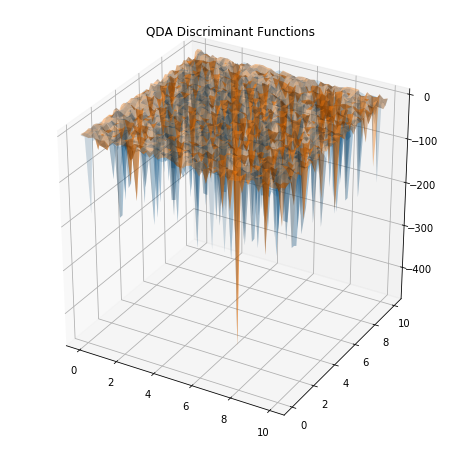

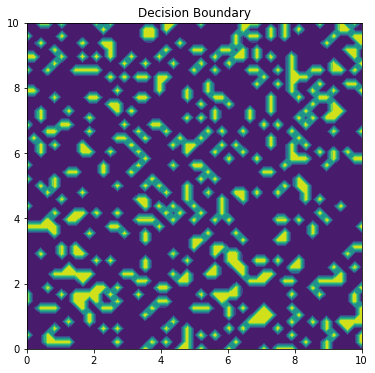

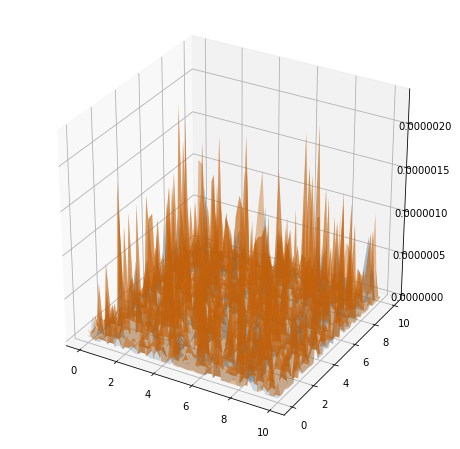

In [29]:
qda = QDA()
qda.train(X_train,X_train_true.shape[0])

t_predicted_train,d1,d2 = qda.use(X_train)
t_predicted_test,d1,d2 = qda.use(X_test)

xs, ys = np.meshgrid(np.linspace(0,10,49), np.linspace(0,10,49))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
d = d1-d2
plt.contourf(xs, ys, (d > 0).reshape(xs.shape))
plt.title("Decision Boundary")

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prior1 = X_train_true.shape[0]/X_train.shape[0]
prior2 = X_train_false.shape[0]/X_train.shape[0]
prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

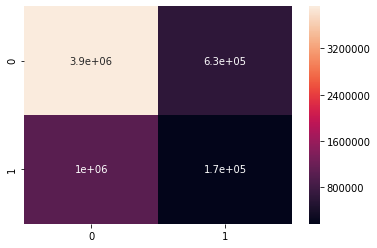

In [30]:
cf = confusion_matrix(t_predicted_test,t_test)
sns.heatmap(cf, annot=True);

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
TN = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TP = cf[1][1]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
print('Precision: ',precision)
print('Recall: ',recall)
print('Specificity: ',specificity)
print('Accuracy:', accuracy_score(t_train,t_predicted_train))
F1_score = 2*precision*recall/(precision+recall)
print('F1 score:',F1_score)

Precision:  0.13785922532278216
Recall:  0.2094960433152853
Specificity:  0.7905039566847147
Accuracy: 0.704683698296837
F1 score: 0.16629062431021446


### LDA

In [32]:
X = df    
T = df[['Revenue']]
indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
T_train, T_test = T.iloc[train_indices], T.iloc[test_indices]

X_train_true = X_train[X_train['Revenue'] == 1]
X_train_true = X_train_true.drop(['Revenue'],axis = 1)
X_train_true.head()
T_train_true = T_train[T_train['Revenue'] == 1]
T_train_true.head()

X_train_false = X_train[X_train['Revenue'] == 0]
X_train_false = X_train_false.drop(['Revenue'],axis = 1)
X_train_false.head()
T_train_false = T_train[T_train['Revenue'] == 0]
T_train_false.head()

X_train = np.vstack((X_train_true,X_train_false))
X_test = X_test.drop(['Revenue'],axis = 1)
X_test = X_test.iloc[:2401]
T_test = T_test.iloc[:2401]

x_train = np.array(X_train)
t_train = np.array(T_train)
x_test = np.array(X_test)
t_test = np.array(T_test)


Text(0.5, 1.0, 'Decision Boundary')

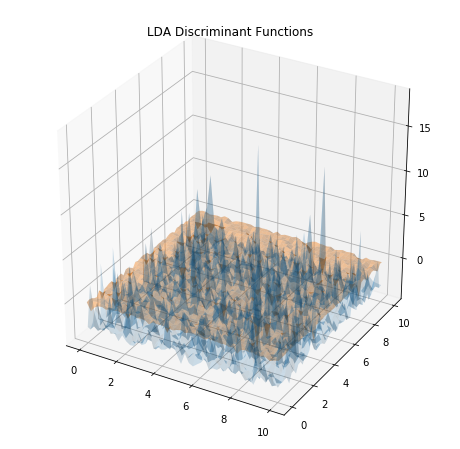

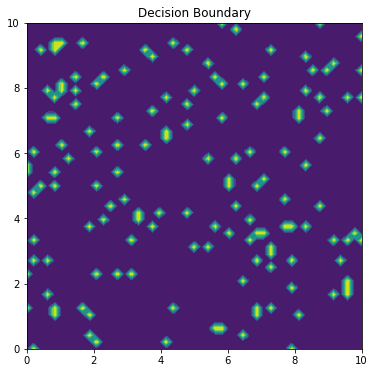

In [33]:
lda = LDA()
lda.train(X_train,X_train_true.shape[0])

t_predicted_train,d1,d2 = lda.use(X_train)
t_predicted_test,d1,d2 = lda.use(X_test)

xs, ys = np.meshgrid(np.linspace(0,10,49), np.linspace(0,10,49))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")


mu1,mu2 = lda.FindMean()
plt.figure(figsize=(6,6))
d = d1-d2
plt.contourf(xs, ys, (d > 0).reshape(xs.shape))
plt.title("Decision Boundary")


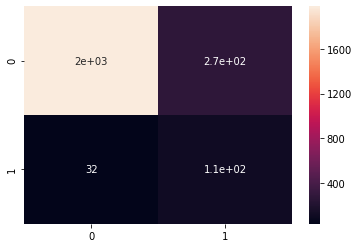

In [34]:
cf = confusion_matrix(t_predicted_test,t_test)
sns.heatmap(cf, annot=True);

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
TN = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TP = cf[1][1]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
print('Precision: ',precision)
print('Recall: ',recall)
print('Specificity: ',specificity)
print('Accuracy:', accuracy_score(t_train,t_predicted_train))
F1_score = 2*precision*recall/(precision+recall)
print('F1 score:',F1_score)

Precision:  0.2927461139896373
Recall:  0.7793103448275862
Specificity:  0.8789893617021277
Accuracy: 0.8146796431467964
F1 score: 0.4256120527306968


### Logistic Regression

In [40]:
import random
X = df    
T = df[['Revenue']]
X = X.drop(['Revenue'],axis = 1)
indices = list(range(len(X)))
training_instances = int(0.8 * X.shape[0])
random.seed(1)
np.random.shuffle(indices)
train_indices = indices[:training_instances]
test_indices = indices[training_instances:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
T_train, T_test = T.iloc[train_indices], T.iloc[test_indices]
X_train = X_train.iloc[:1500]
T_train = T_train.iloc[:1500]
X_test = X_test.iloc[:500]
T_test = T_test.iloc[:500]

x_train = np.array(X_train)
t_train = np.array(T_train)
x_test = np.array(X_test)
t_test = np.array(T_test)

/Users/sanikapol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


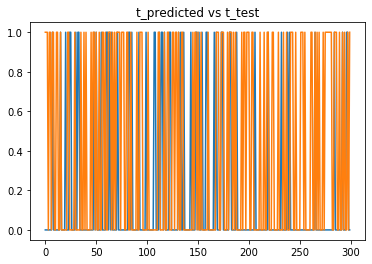

In [41]:
lr = LogisticRegression(10,0.1)
lr.train(x_train,t_train)
plt.title('t_predicted vs t_test')
t_predicted_train = lr.use(x_train)
t_predicted_train1 = np.argmax(t_predicted_train,1)
t_predicted_test = lr.use(x_test)
t_predicted_test1 = np.argmax(t_predicted_test,1)
plt.plot(t_test[:300])
plt.plot(t_predicted_test1[:300])

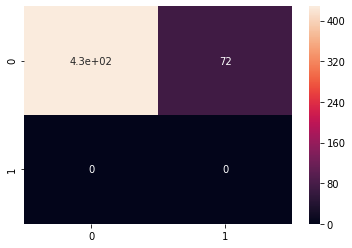

In [38]:
cf = confusion_matrix(t_predicted_test1,t_test)
sns.heatmap(cf, annot=True);

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
TN = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]
TP = cf[1][1]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
print('Precision: ',precision)
print('Recall: ',recall)
print('Specificity: ',specificity)
print('Accuracy:', accuracy_score(t_train,t_predicted_train1))
F1_score = 2*precision*recall/(precision+recall)
print('F1 score:',F1_score)

Precision:  0.0
Recall:  nan
Specificity:  0.856
Accuracy: 0.5646666666666667
F1 score: nan


/Users/sanikapol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


## Discussion about evaluation metrics
To calculate the performance of a machine learning model is important as it tells us how accurately the model can predict. For this we use confusion matrix. It is a table that reports the number of false positives, false negatives, true positives, and true negatives. Using these values we can evaluate the performance of our model.<br> 

**Precision** : The accuracy of positive predictions. We can read this as the ratio that my positive prediction is correct.
$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

**Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

**Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

**F1 Score** : This is a single measure rather than multiple measures as above. It is goven by:
$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

**MCC (Matthews Correlation Coefficient)** : uses all the counts in confusion matrix for the metric. 
$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$  

**The ROC (Receiver Operating Characteristic) Curve** : The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity).


## Discussion about train and test accuracies
Following are the train and test accuracies of the moldels executed on my data.

### Pocket
<ul style="list-style-type:circle;">
    <li>Precision:  0.25</li>
    <li>Recall:  0.2777777777777778</li>
    <li>Specificity:  0.8598130841121495</li>
    <li>Accuracy: 0.764</li>
    <li>F1 score: 0.2631578947368421</li>

### QDA
<ul style="list-style-type:circle;">
    <li>Precision:  0.6621621621621622</li>
    <li>Recall:  0.4841897233201581</li>
    <li>Specificity:  0.9340369393139841</li>
    <li>Accuracy: 0.7106650446066505</li>
    <li>F1 score: 0.5593607305936072</li>

### LDA 
<ul style="list-style-type:circle;">
    <li>Precision:  0.2764227642276423</li>
    <li>Recall:  0.7786259541984732</li>
    <li>Specificity:  0.8823788546255507</li>
    <li>Accuracy: 0.8082927818329279</li>
    <li>F1 score: 0.40800000000000003</li>

### Logistic Regression
<ul style="list-style-type:circle;">
    <li>Precision:  0.166</li>
    <li>Recall:  0.198</li>
    <li>Specificity:  0.802</li>
    <li>Accuracy: 0.8746666666666667</li>
    <li>F1 score: 0.1805934065934066</li>

## Discussions about classification model comparison
<ul style="list-style-type:circle;">
    <li>From the above observations of the performance measures, LDA and QDA work better on my data than pocket or logistic regression.</li>
    <li>For pocket it is taking a lot of time to plot the output graph on the complete data. Hence I have sampled my data. </li>
    <li>My data is biased. It can be observed from the pie chart in data visualization. Thus, I have sampled the data for logistic regression as well. </li>
    <li>However, for QDA and LDA I have considered the complete data and hence the accuracy of QDA and LDA is better than pocket and logistic regression.</li>
    <li>In addition if we compare QDA and LDA, based on all the performance measures, QDA performs better than LDA. Though accuracy for LDA is greater then QDA, other parameters are better for QDA and hence it works the best on this data.</li>
 

# Conclusions
**Best Classifier**
From the observed performance measures, QDA works the best on this data.<br>
**What I learned**
<ul style="list-style-type:circle;">
<li>I learned the working of different classification algorithms like pocket algorithm, QDA, LDA and logistic</li> regression. <li>I also learned about the different evaluation metrics which can help us find how well our model works.</li>
 

 

**Challenges faced**
<ul style="list-style-type:circle;">
<li>Pocket algorithm takes lot of time to execute on a large amount of data.</li>
<li>My data is biased. I have two classes and more than 75% of my data is one type of class</li>
<li>When I select run all, accessing confusion matrix cells for pocket algorithm gives error and logistic regression plot gives an error. However, if I run the cells one by one from top to bottom, everything is executes correctly. Attaching an html file as well. It shows all the outputs correctly. </li>   

# References

1. UCI Machine Learning Repository: Online Shoppers Purchasing Intention Dataset Data Set, https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset Shoppers Purchasing Intention Dataset.
2. Sakar, C. Okan, et al. “Real-Time Prediction of Online Shoppers' Purchasing Intention Using Multilayer Perceptron and LSTM Recurrent Neural Networks.” SpringerLink, Springer London, 9 May 2018, https://link.springer.com/article/10.1007/s00521-018-3523-0.
3. CODE_DIYCODE_DIY 2055 bronze badges, et al. “Train Test Split without Using Scikit Learn.” Stack Overflow, 1 Mar. 1968, https://stackoverflow.com/questions/47202182/train-test-split-without-using-scikit-learn.
4. “Class Note Linear Classification.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb
5. “Class Note Classification” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.Sol.ipynb.
6. “Perceptron.” Wikipedia, Wikimedia Foundation, 19 Sept. 2019, https://en.wikipedia.org/wiki/Perceptron.
7. srjoglekar246. “Linear and Quadratic Discriminant Analysis for ML / Statistics Newbies.” Sachin Joglekar's Blog, 25 Aug. 2015, https://codesachin.wordpress.com/2015/08/25/linear-and-quadratic-discriminant-analysis-for-ml-statistics-newbies/.
8. “Powerful Python Data Analysis Toolkit.” Pandas, https://pandas.pydata.org/pandas-docs/stable/.
9. “Overview.” Overview - Matplotlib 3.1.1 Documentation, https://matplotlib.org/3.1.1/contents.html.
10. “HTML5 Tutorial.” HTML Tutorial, https://www.w3schools.com/html/default.asp.
11. “Markdown.” / Wiki / Markdown Syntax, https://sourceforge.net/p/jupiter/wiki/markdown_syntax/.
12. “Statistical Data Visualization¶.” Seaborn, https://seaborn.pydata.org/index.html.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)